# Modelado del texto 


## 1. Preprocesamiento del texto
### El preprocesamiento del texto consiste en curar los datos para la vectorizaci√≥n. Sin embargo, depende del dominio del problema.
### Entre las actividades m√°s comunes se tienen:
- #### Remover acentos, n√∫meros, s√≠mbolos duplicados  y s√≠mbolos raros
- #### Convertir a min√∫sculas
- #### Obtener unigramas, bigramas, trigramas de ***palabras***,  etc. 
- #### Obtener unigramas, bigramas, trigramas de ***caracteres***,  etc.

# 1.0 Lectura de archivos

In [1]:
# Lectura de archivos  TXT
with open('./data/text_1.txt', 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        print(linea.strip())  # Usamos strip() para quitar el salto de l√≠nea al final

El hereje rebelde
En el verde ceÃÅsped del edeÃÅn, ceÃÅlebre sede de creyentes, el decente EfreÃÅn se estremece. Tres deberes del mes lee en el templete del regente: ¬´Defender el vergel del Hereje Rebelde, tener fe en el celeste Jefe de tez perenne, ser excelente¬ª. El membrete del Jefe es esplendente, se ve de kermeÃÅs. Esther se embellece enfrente de EfreÃÅn: es de temple terrestre, cree levemente en el deber, el degenere en vez de repelerle le vence. Se ven brevemente, temen se decrete el envejecer, se envenene el eÃÅter, se cercene gente, se eleve el jerez. Desde el estreÃÅs del Jefe el edeÃÅn decrece, el excedente le pertenece, se ejercen leyes dementes, se debe beber detergente en vez de leche, ser pelele, ser pedestre, ser deferente; es menester entretenerse en tejer redes, en prender rebeldes. En el Este, trece rehenes perecen de sed; en el frente fenecen de herpes, de peste. El edeÃÅn se ennegrece, se pretende reprender herejes, perderles.
‚Äî¬°Eh, Esther, ven!, relee el debe

In [2]:
# Lectura de archivos en formato JSON

import pandas as pd
d = pd.read_json("./data/text_3.json", lines=True)
d.head(10)

created_at                   id  \
0 2020-03-29 06:16:55+00:00  1244146499111374849   
1 2020-03-21 05:28:06+00:00  1241235112848752641   
2 2020-03-24 23:50:56+00:00  1242599813520162819   
3 2020-03-23 01:43:20+00:00  1241903323369758720   
4 2020-03-13 17:39:28+00:00  1238520062178459648   
5 2020-03-21 14:46:02+00:00  1241375522413838344   
6 2020-03-25 06:01:39+00:00  1242693106937540609   
7 2020-03-09 04:10:20+00:00  1236866887541284864   
8 2020-03-17 17:43:37+00:00  1239970661465915392   
9 2020-03-19 19:17:24+00:00  1240719038902231041   

                                                text  
0  Ya nos pusimos al pedo mi vecina y yo, y pasar...  
1              Extra√±o los juegos de Jak and Daxter.  
2                                            Carajo!  
3  @jrodolfoazul97 @ismeraipons Si estaba muy bue...  
4  @OdiliaRomero Si verdad, ll√©vame a viajar por ...  
5               @Cartoo ¬°JaJaJa! Yo la vi toda ü§¶üèª‚Äç‚ôÇÔ∏è  
6  Pinches gatos presumido arriba del techo, esta...  
7  @Chucho_MTY Ya voy para ajuera con Chester y E...  
8                      @ElUberTigre JAJAJAJAJAJAJAJA  
9  @AlexisjRamirezp No lo voy a ver por que ya no...

In [3]:
# acceder a los datos del Frame

d["text"][300]

'Lobitto üê∫ü§≠ que calor https://t.co/SAs33uE1Bw'

In [4]:
#Convertirlos en una lista

list (d["text"])

['Ya nos pusimos al pedo mi vecina y yo, y pasaremos la informaci√≥n a los dem√°s y a nuestros roomies, y decidimos cam‚Ä¶ https://t.co/bve6gkk4yf',
 'Extra√±o los juegos de Jak and Daxter.',
 'Carajo!',
 '@jrodolfoazul97 @ismeraipons Si estaba muy bueno, muchas gracias bro',
 '@OdiliaRomero Si verdad, ll√©vame a viajar por Estados Unidos contigo para que se me quite la fantas√≠a.',
 '@Cartoo ¬°JaJaJa! Yo la vi toda ü§¶üèª\u200d‚ôÇÔ∏è',
 'Pinches gatos presumido arriba del techo, estamos en cuarentena putos :(',
 '@Chucho_MTY Ya voy para ajuera con Chester y Estopita',
 '@ElUberTigre JAJAJAJAJAJAJAJA',
 '@AlexisjRamirezp No lo voy a ver por que ya no quiero enojarme m√°s...',
 '@V_TrujilloM @lopezobrador_ Ya d√©jenlo est√°n llenos odio solo por que les quito la mano que les daba de tragar',
 '@DevilCronos @FaustoLucifer T√∫, con gorra.',
 'Amigos ya hice el ejercicio de hoy.\n\nBike one hour!!',
 'Te odio @nhhotelgroup üòñ',
 '@isaBonhamC Me los hago por ti dd ‚ò∫Ô∏è',
 'Mi tipo de 

# 1.1 Normalizaci√≥n del texto
- Eliminar acentos
- Eliminar duplicados
- Eliminar puntuaci√≥n
- mantiene solo un espacio entre los tokens

In [5]:
# Normalizaci√≥n del texto

import unicodedata
import re
PUNCTUACTION = ";:,.\\-\"'/"
SYMBOLS = "()[]¬ø?¬°!{}~<>|"
NUMBERS= "0123456789"
SKIP_SYMBOLS = set(PUNCTUACTION + SYMBOLS)
SKIP_SYMBOLS_AND_SPACES = set(PUNCTUACTION + SYMBOLS + '\t\n\r ')

def normaliza_texto(input_str,
                    punct=False,
                    accents=False,
                    num=False,
                    max_dup=2):
    """
        punct=False (elimina la puntuaci√≥n, True deja intacta la puntuaci√≥n)
        accents=False (elimina los acentos, True deja intactos los acentos)
        num= False (elimina los n√∫meros, True deja intactos los acentos)
        max_dup=2 (n√∫mero m√°ximo de s√≠mbolos duplicados de forma consecutiva, rrrrr => rr)
    """
    
    nfkd_f = unicodedata.normalize('NFKD', input_str)
    n_str = []
    c_prev = ''
    cc_prev = 0
    for c in nfkd_f:
        if not num:
            if c in NUMBERS:
                continue
        if not punct:
            if c in SKIP_SYMBOLS:
                continue
        if not accents and unicodedata.combining(c):
            continue
        if c_prev == c:
            cc_prev += 1
            if cc_prev >= max_dup:
                continue
        else:
            cc_prev = 0
        n_str.append(c)
        c_prev = c
    texto = unicodedata.normalize('NFKD', "".join(n_str))
    texto = re.sub(r'(\s)+', r' ', texto.strip(), flags=re.IGNORECASE)
    return texto



In [6]:
# Normaliza el texto 
# no hace la separaci√≥n de tokens si est√°n unidos por un s√≠mbolo o signo de puntuaci√≥n. Realizar un proceso combinado, p. e., tokenizaci√≥n y normalizado 

texto = "En Broadway, a la altura de la calle 113, no soÃÅlo se habla en un espanÃÉol nasal y contaminado;tambieÃÅn podriÃÅa decirse que se piensa, se camina y se come en espanÃÉol"

print(f"Texto original: \n\t{texto}\n")
texto_nuevo = normaliza_texto(texto)

#Algunas palabras se juntan "contaminadotambien"

print(texto_nuevo)

texto_nuevo = normaliza_texto(texto, num=True)

#Algunas palabras se juntan "contaminadotambien"

print(texto_nuevo)



Texto original: 
	En Broadway, a la altura de la calle 113, no soÃÅlo se habla en un espanÃÉol nasal y contaminado;tambieÃÅn podriÃÅa decirse que se piensa, se camina y se come en espanÃÉol

En Broadway a la altura de la calle no solo se habla en un espanol nasal y contaminadotambien podria decirse que se piensa se camina y se come en espanol
En Broadway a la altura de la calle 113 no solo se habla en un espanol nasal y contaminadotambien podria decirse que se piensa se camina y se come en espanol


# Ejercicio:
- ### Normalizar el texto del archivo text_1.txt que se encuentra en la carpeta "data" 


In [7]:
# TODO. Aplicar la normalizaci√≥n de texto a los datos del archivo "text_1.txt"

# 1.2 Tokenizaci√≥n: Obtener las oraciones o  tokens del texto 

## Instalando datos de NLTK

In [8]:
#instalando los modelos, incluidos el espa√±ol

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Separaci√≥n de las oraciones del texto

In [9]:
## Cargar el tokenizador de oraciones para el espa√±ol

tokenizador_oraciones = nltk.data.load('tokenizers/punkt/spanish.pickle')

In [10]:
texto = "De los cerros altos del sur, el de Luvina es el m√°s alto y el m√°s pedregoso. Est√° plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella" \
        " ni le sacan ning√∫n provecho. All√≠ la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda. El aire y el sol se han encargado de desmenuzarla," \
        " de modo que la tierra de por all√≠ es blanca y brillante como si estuviera rociada siempre por el roc√≠o del amanecer; aunque esto es un puro decir, porque en Luvina los d√≠as son tan" \
        " fr√≠os como las noches y el roc√≠o se cuaja en el cielo antes que llegue a caer sobre la tierra."

tokenizador_oraciones = nltk.data.load('tokenizers/punkt/spanish.pickle')
oraciones = tokenizador_oraciones.tokenize(texto)
print(oraciones)


['De los cerros altos del sur, el de Luvina es el m√°s alto y el m√°s pedregoso.', 'Est√° plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella ni le sacan ning√∫n provecho.', 'All√≠ la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda.', 'El aire y el sol se han encargado de desmenuzarla, de modo que la tierra de por all√≠ es blanca y brillante como si estuviera rociada siempre por el roc√≠o del amanecer; aunque esto es un puro decir, porque en Luvina los d√≠as son tan fr√≠os como las noches y el roc√≠o se cuaja en el cielo antes que llegue a caer sobre la tierra.']


## Tokenizar: Obtener los tokens del texto 

In [11]:
from  nltk import word_tokenize

texto = "De los cerros altos del sur, el de Luvina es el m√°s alto y el m√°s pedregoso."

tokens = word_tokenize(texto)
print(tokens)

['De', 'los', 'cerros', 'altos', 'del', 'sur', ',', 'el', 'de', 'Luvina', 'es', 'el', 'm√°s', 'alto', 'y', 'el', 'm√°s', 'pedregoso', '.']


# 1.3 Obtenci√≥n de caracter√≠sticas para el clasificador

# N-Gramas


### 1-gramas o Unigramas

- #### Un **unigrama** (puede ser unigrama de palabras o caracteres) es la unidad m√°s b√°sica dentro del an√°lisis de texto en ling√º√≠stica computacional y procesamiento del lenguaje natural (NLP). 
- #### Consiste en una √∫nica palabra o elemento dentro de una secuencia de texto. 
- #### Los unigramas se enfocan en el an√°lisis palabra por palabra de forma individual.
- #### Los unigramas suelen ser √∫tiles en tareas como la clasificaci√≥n de texto, el an√°lisis de frecuencias de palabras y la identificaci√≥n de temas clave dentro de un texto.


Por ejemplo, si tomamos el texto:  

**"De los cerros altos del sur el de Luvina es el m√°s alto"**

Los unigramas ser√≠an simplemente cada una de las palabras individuales:

1. *De*
2. *los*
3. *cerros*
4. *altos*
5. *del*
6. *sur*
7. *el*
8. *de*
9. *Luvina*
10. *es*
11. *el*
12. *m√°s*
13. *alto*



In [12]:
from  nltk import word_tokenize

texto = "De los cerros altos del sur el de Luvina es el m√°s alto"

tokens = word_tokenize(texto)
print(tokens)

['De', 'los', 'cerros', 'altos', 'del', 'sur', 'el', 'de', 'Luvina', 'es', 'el', 'm√°s', 'alto']


# Ejercicio: 

- ## Dado el texto "texto1":
    -  ### Extraer las oraciones
    -  ### Extraer las lista de tokens para cada oraci√≥n

```python

texto1 = "San Juan Luvina. Me sonaba a nombre de cielo aquel nombre. Pero aquello es el purgatorio. Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que all√≠ sopla, no se oye sino el silencio que hay en todas las soledades. Y eso acaba con uno. M√≠reme a m√≠. Conmigo acab√≥. Usted que va para all√° comprender√° pronto lo que le digo."
```



In [13]:
# TODO:  Procesar el texto1: separar las oraciones y extraer la lista  de tokens.

In [14]:

# TODO: Procesar el texto1: separar las oraciones y extraer la lista  de tokens, normalizar el texto y  NO incluir los signos de puntuaci√≥n.


### 2-gramas o Bigramas
Un bigrama es una secuencia de dos elementos contiguos dentro de un texto. Estos elementos pueden ser palabras, caracteres o unidades fon√©ticas, dependiendo del tipo de an√°lisis que se realice. En el caso del an√°lisis de texto, los bigramas m√°s comunes son los formados por palabras consecutivas.

Cada bigrama refleja la transici√≥n entre dos palabras dentro de la oraci√≥n, y su an√°lisis puede ser √∫til en √°reas como la ling√º√≠stica computacional, el an√°lisis de texto o los modelos predictivos de lenguaje.

Ejemplo:

"De los cerros altos del sur, el de Luvina es el m√°s alto"

Al crear bigramas de palabras, tomamos dos palabras consecutivas a la vez. Los bigramas para esta frase ser√≠an:

1. *De, los*
2. *los, cerros*
3. *cerros, altos*
4. *altos, del*
5. *del, sur*
6. *sur, el*
7. *el, de*
8. *de, Luvina*
9. *Luvina, es*
10. *es, el*
11. *el, m√°s*
12. *m√°s, alto*


In [15]:
# C√°lculo de bigramas
from  nltk.util import bigrams

texto = "De los cerros altos del sur el de Luvina es el m√°s alto"
tokens = word_tokenize(texto)
bigramas = bigrams(tokens)
bigramas = list(bigramas)
bigramas

[('De', 'los'),
 ('los', 'cerros'),
 ('cerros', 'altos'),
 ('altos', 'del'),
 ('del', 'sur'),
 ('sur', 'el'),
 ('el', 'de'),
 ('de', 'Luvina'),
 ('Luvina', 'es'),
 ('es', 'el'),
 ('el', 'm√°s'),
 ('m√°s', 'alto')]


### 3-gramas o Trigramas
Un trigrama  es una secuencia de tres  elementos contiguos dentro de un texto. 

In [16]:
# C√°lculo de trigramas
from  nltk.util import ngrams

texto = "De los cerros altos del sur el de Luvina es el m√°s alto"
trigramas = ngrams(tokens, 3)
trigramas = list(trigramas) 
trigramas

[('De', 'los', 'cerros'),
 ('los', 'cerros', 'altos'),
 ('cerros', 'altos', 'del'),
 ('altos', 'del', 'sur'),
 ('del', 'sur', 'el'),
 ('sur', 'el', 'de'),
 ('el', 'de', 'Luvina'),
 ('de', 'Luvina', 'es'),
 ('Luvina', 'es', 'el'),
 ('es', 'el', 'm√°s'),
 ('el', 'm√°s', 'alto')]

# Ejercicio: 

- ## Dado el archivo en formato JSON  "text_3.json" de la carpeta data:
    -  ### Obtener los bigramas sin normalizar 
    -  ### Obtener los bigramas normalizados



In [17]:
# TODO:  Procesar el texto "text_3.json", separar las oraciones y extraer los bigramas sin normalizar


In [18]:

# TODO:  Procesar el texto "text_3.json", separar las oraciones y extraer los bigramas normalizados

 # 1.4 Documentos representados como vectores

#### - En el **modelado de texto**, las palabras o frases se representan de forma **vectorial**, es decir, como vectores (listas de n√∫meros). 
#### - Esto permite que los algoritmos de aprendizaje autom√°tico y procesamiento del lenguaje natural puedan trabajar con el texto, ya que estos modelos necesitan, principalmente, representaciones num√©ricas  para procesar datos. 
#### - Los m√©todos m√°s comunes para convertir texto en vectores incluyen t√©cnicas como **bag of words** (unigramas) presencia y ausencia, pesados **TF**, **TF-IDF**, entrop√≠a, y otros similares. 
#### - Otra representaci√≥n popular son los **Word Embeddings** (como Word2Vec, GloVe, BERTs), que capturan tanto la presencia de palabras como su contexto sem√°ntico en un espacio num√©rico.

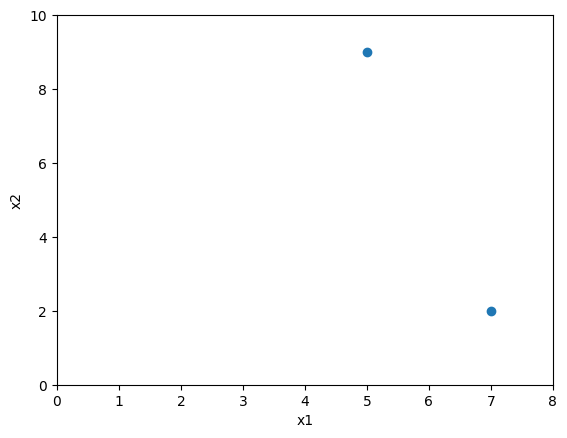

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# dos caracter√≠sticas por documento: (x1, x2) 
doc1=[5, 9]
doc2=[7, 2]
docs = [doc1, doc2]

x1 = [d[0] for d in docs]
x2 = [d[1] for d in docs]

fig, axis = plt.subplots()
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_xlim(0, max(x1) + 1)
axis.set_ylim(0, max(x2) + 1)
axis.scatter(x1, x2)
plt.show()

## Documentos representados como vectores
- #### Se puede operar sobre los vectores. 
- #### Por ejemplo, calcular la similitud entre los Documentos A y B, por medio de la similitud coseno


# $$ cosine(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $$

## Modelado del Copus de documentos
- ### cada rengl√≥n representa un documento

In [20]:
docs = [
"El cielo es azul",
"El sol es brillante",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"Juan Luis ama a maria",
"Maria ama a Luis",
"la estrella de la ma√±ana y la estrella del atardecer es la misma estrella",
"El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]

# Extracci√≥n de vocabulario¬∂

In [21]:
# vocabulario
palabras=[]

for d in docs:
    for t in d.split():
        palabras.append(t.lower())
# Generaci√≥n del vocabulario √∫nico
vocabulario=list(sorted(set(palabras)))

print("tokens:",len(palabras))
print("tokens √∫nicos:", len(vocabulario))
vocabulario

tokens: 73
tokens √∫nicos: 35


['a',
 'al',
 'alba',
 'ama',
 'amanecer.',
 'atardecer',
 'atardecer.',
 'azul',
 'brillante',
 'brillante,',
 'cielo',
 'cuando',
 'de',
 'del',
 'el',
 'en',
 'es',
 'estrella',
 'firmamento',
 'juan',
 'la',
 'le',
 'llama',
 'lucero',
 'luis',
 'maria',
 'ma√±ana',
 'misma',
 'podemos',
 'se',
 'sol',
 'tarde',
 'ver',
 'visible',
 'y']

# 1.5 Construcci√≥n de la matriz Documento-T√©rmino

In [22]:
import numpy as np
# Construcci√≥n de la matriz Documento-T√©rmino (num_documentos x tama√±o_vocabulario)
# Pesado o ponderaci√≥n de acuerdo a su frecuencia de aparici√≥n del t√©rmino
vsm =  np.zeros((len(docs), len(vocabulario)), dtype=float)
for k, d in enumerate(docs):
    for t in d.lower().split():
        i = vocabulario.index(t)
        vsm[k, i] += 1

In [23]:
#Forma de la matriz resultante
vsm.shape

(8, 35)

### Visualizaci√≥n de los documentos en su representaci√≥n vectorial 

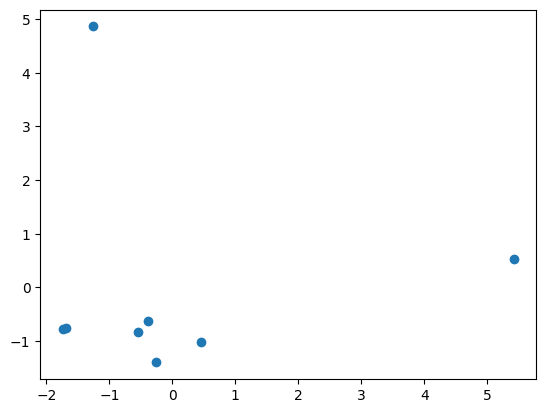

In [24]:
from sklearn.decomposition import PCA
# An√°lisis de componentes principales

pca = PCA(n_components=2)
two_dim = pca.fit_transform(vsm)
scatter_x = two_dim[:, 0] # primera componente principal
scatter_y = two_dim[:, 1] # segunda componente principal
plt.scatter(scatter_x, scatter_y)
plt.show()

### Ejemplo del c√°lculo de la similitud entre dos documentos con la similitud coseno

#### $ similitud\_coseno(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $

In [25]:
import numpy as np

def print_texto(v):
    # obtiene los √≠ndices de las palabras presentes en el vector
    indices = np.flatnonzero(v>0)
    for i in indices:
        print(vocabulario[i], end=" ")
    print()

def similitud_coseno(a, b):
    return np.sum(a*b)/(np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2))))

a = vsm[1]
b = vsm[2]

print(similitud_coseno(a,b))

print_texto(a)
print_texto(b)



0.8333333333333334
brillante el es sol 
brillante cielo el en es sol 


# 1.6 Pesado de los t√©rminos seg√∫n su importancia
- #### TF: Term Frequency
- #### TF-IDF: Term Frequency-Inverse Document Frecuency

### Pesado TF: Term Frequency (Frecuencia del T√©rmino)


### sklearn: CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

#Ajusta el modelo con pesado TF, se obtiene la matriz Documento-T√©rmino
X = vec.fit_transform(docs)


# Features o Componentes o T√©rminos de la matriz 
print(vec.get_feature_names_out())

#Tama√±o del vocabulario
print("vocabulario: ", len(vec.get_feature_names_out()))

# Matriz  Documento-T√©rmino
print(X.toarray())




['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cuando' 'de' 'del' 'el' 'en' 'es' 'estrella' 'firmamento' 'juan' 'la'
 'le' 'llama' 'lucero' 'luis' 'maria' 'ma√±ana' 'misma' 'podemos' 'se'
 'sol' 'tarde' 'ver' 'visible']
vocabulario:  31
[[0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 0 0 1 3 0 0 4 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [2 1 0 1 1 0 0 1 1 1 1 4 2 2 0 1 0 1 1 1 2 0 0 0 0 0 1 0 1 0 2]]


### Personalizando la construcci√≥n de la matriz Documento-T√©rmino 

### Unigramas y bigramas

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
    
# usar unigramas y bigramas como features:  ngram_range=(1,2)

vec = CountVectorizer(analyzer="word", ngram_range=(1,2))
X = vec.fit_transform(docs)
print(vec.get_feature_names_out())
print(X.toarray())
print("vocabulario: ", len(vec.get_feature_names_out()))


['al' 'al amanecer' 'al atardecer' 'alba' 'alba se' 'ama' 'ama luis'
 'ama maria' 'amanecer' 'amanecer el' 'atardecer' 'atardecer es' 'azul'
 'brillante' 'brillante el' 'cielo' 'cielo al' 'cielo es' 'cuando'
 'cuando es' 'de' 'de la' 'del' 'del alba' 'del atardecer' 'el' 'el cielo'
 'el firmamento' 'el lucero' 'el sol' 'en' 'en el' 'es' 'es azul'
 'es brillante' 'es la' 'es visible' 'estrella' 'estrella de'
 'estrella del' 'firmamento' 'firmamento al' 'juan' 'juan luis' 'la'
 'la estrella' 'la ma√±ana' 'la misma' 'la tarde' 'le' 'le llama' 'llama'
 'llama cuando' 'lucero' 'lucero de' 'lucero del' 'luis' 'luis ama'
 'maria' 'maria ama' 'ma√±ana' 'ma√±ana la' 'misma' 'misma estrella'
 'podemos' 'podemos ver' 'se' 'se le' 'sol' 'sol brillante' 'sol en'
 'sol es' 'tarde' 'tarde es' 'ver' 'ver el' 'visible' 'visible en']
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0

### Usar un preprocesamiento de datos personalizado

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [
"El cielo es azul 5342534523534 !!!!!?????????!",
"El sol es brillante  ?????!!!!!!",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MAR√≠A !!!!!",
"Mar√≠a ama a Luis",
"la estrella de la ma√±ana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]


# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a min√∫sculas el texto antes de normalizar
    print("antes: ", texto)
    texto = normaliza_texto(texto.lower())
    print("despu√©s:",texto)
    return texto
    
vec = CountVectorizer(analyzer="word", preprocessor=mi_preprocesamiento,  ngram_range=(1,1))
X = vec.fit_transform(docs)
print(vec.get_feature_names_out())
print(X.toarray())
print("vocabulario: ", len(vec.get_feature_names_out()))


antes:  El cielo es azul 5342534523534 !!!!!?????????!
despu√©s: el cielo es azul
antes:  El sol es brillante  ?????!!!!!!
despu√©s: el sol es brillante
antes:  El sol en el cielo es brillante
despu√©s: el sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
despu√©s: podemos ver el sol brillante el sol brillante
antes:  JUAN LUIS,  ama MAR√≠A !!!!!
despu√©s: juan luis ama maria
antes:  Mar√≠a ama a Luis
despu√©s: maria ama a luis
antes:  la estrella de la ma√±ana y la estrella del atardecer es la misma estrella
despu√©s: la estrella de la manana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
despu√©s: el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cua

# Pesado TF-IDF: Term Frequency-Inverse Document Frequency

- #### Es una t√©cnica utilizada para evaluar la relevancia de una palabra dentro de un documento en relaci√≥n con un conjunto de documentos (corpus). Combina dos conceptos:

    - ##### TF (Frecuencia de T√©rmino): Mide cu√°ntas veces aparece una palabra en un documento, ponderando la importancia de palabras m√°s frecuentes.
    - ##### IDF (Frecuencia Inversa de Documentos): Penaliza las palabras que aparecen en muchos documentos del corpus, dando m√°s peso a las que son m√°s raras o espec√≠ficas.
    - ##### El resultado es un valor que refleja la importancia de una palabra dentro de un documento, disminuyendo el peso de las palabras comunes y realzando las m√°s distintivas. Es √∫til para tareas como clasificaci√≥n de texto, b√∫squeda de informaci√≥n y extracci√≥n de caracter√≠sticas.



$$TF-IDF(t,d) = TF(t,d) * IDF(t)$$
$$TF(t,d) = f_{(t,d)}$$

$$IDF(t)= \log \frac {N}{d_t + 1}  $$

$$ N:  total\ de\ documentos $$ 
$$ d_t:  n√∫mero\ de\ documentos \ donde \ aparece \ el \ t√©rmino \ t $$ 

### sklearn: TfidfVectorizer

In [34]:
docs = [
"El cielo es azul 5342534523534 !!!!!?????????!",
"El sol es brillante  ?????!!!!!!",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MAR√≠A !!!!!",
"Mar√≠a ama a Luis",
"la estrella de la ma√±ana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]


from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a min√∫sculas el texto antes de normalizar
    print("antes: ", texto)
    texto = normaliza_texto(texto.lower())
    print("despu√©s:",texto)
    return texto
    
    

vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento,  ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print(X_tfidf.toarray())

antes:  El cielo es azul 5342534523534 !!!!!?????????!
despu√©s: el cielo es azul
antes:  El sol es brillante  ?????!!!!!!
despu√©s: el sol es brillante
antes:  El sol en el cielo es brillante
despu√©s: el sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
despu√©s: podemos ver el sol brillante el sol brillante
antes:  JUAN LUIS,  ama MAR√≠A !!!!!
despu√©s: juan luis ama maria
antes:  Mar√≠a ama a Luis
despu√©s: maria ama a luis
antes:  la estrella de la ma√±ana y la estrella del atardecer es la misma estrella
despu√©s: la estrella de la manana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
despu√©s: el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cua

# Ejercicio:
 - ### Obtener la matriz Documento-T√©rmino del archivo text_3.json
 - ### Mejorar el preprocesamiento del texto: convertir a min√∫sculas, separar las oraciones, normalizar el texto, y separar los tokens adecuadamente


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    print("antes: ", texto)

    #TODO: Mejorar el preprocesamiento, convertir a min√∫sculas, separar las oraciones, normalizar el texto, y separar los tokens



    print("despu√©s:",texto)
    return texto
    
# Tokenizador personalizado 


vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento, ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print("vocabulario: ", len(vec_tfidf.get_feature_names_out()))


antes:  El cielo es azul 5342534523534 !!!!!?????????!
despu√©s: El cielo es azul 5342534523534 !!!!!?????????!
antes:  El sol es brillante  ?????!!!!!!
despu√©s: El sol es brillante  ?????!!!!!!
antes:  El sol en el cielo es brillante
despu√©s: El sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
despu√©s: Podemos ver el sol brillante, el sol brillante
antes:  JUAN LUIS,  ama MAR√≠A !!!!!
despu√©s: JUAN LUIS,  ama MAR√≠A !!!!!
antes:  Mar√≠a ama a Luis
despu√©s: Mar√≠a ama a Luis
antes:  la estrella de la ma√±ana y la estrella del atardecer es la misma estrella
despu√©s: la estrella de la ma√±ana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
despu√©s:  El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
['5342534523534'

# 1.7 T√©cnicas para reducir las caracter√≠sticas (**features**) textuales
#### - **Stemming**.  Corta los finales de las palabras de acuerdo a un conjunto de reglas
#### - **Lematizaci√≥n**. Reducir a la forma normal de la palabra, es decir, verbos a infinitivo; adjetivos a masculino, singular;  sustantivos a singular.
#### - **Remover StopWords**. Eliminar palabras que no se consideran de contenido, es decir, que no aportan a la sem√°ntica como preposiciones: a, ante, de, desde, etc.; conjunciones entre otras.


# Stemming

### - El stemming es el proceso de reducir las palabras a su ra√≠z o base sin considerar su contexto gramatical.
### - A menudo, la ra√≠z obtenida no es una palabra real, pero es √∫til para tareas de procesamiento de lenguaje natural.
### - Algoritmos populares de stemming incluyen el **algoritmo de Porter** y el **algoritmo de Snowball**.
### - Herramientas como **NLTK** incluyen implementaciones de estos algoritmos para varios idiomas.
### - A diferencia de la lematizaci√≥n, el stemming es m√°s r√°pido pero menos preciso.


In [31]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")
print(stemmer.stem("mesas"))
print(stemmer.stem("mesa"))

mes
mes


# Lematizaci√≥n 

### - La lematizaci√≥n es el proceso de reducir las palabras a su forma base o "lema", considerando su contexto gramatical.
### - A diferencia del stemming, la lematizaci√≥n analiza la estructura ling√º√≠stica para obtener una forma m√°s precisa.
### - Ejemplo: "corriendo" y "corri√≥" se reducen a "correr" (verbo en infinitivo).
### - Herramientas como **spaCy** ofrecen lematizaci√≥n en varios idiomas.
### - **NLTK** y **TextBlob** tambi√©n permiten realizar lematizaci√≥n.
### - **spaCy** es reconocido por su eficiencia y precisi√≥n al considerar el contexto gramatical.


###  Instalaci√≥n de los modelos de spacy

In [32]:
!python -m spacy download es_core_news_md
#!python -m spacy download es_core_news_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 4.1 MB/s eta 0:00:0000:0100:01
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [33]:
import spacy
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_md")
doc = nlp("me com√≠ unas galletas con mis amigos, pero despu√©s Juan se comi√≥ la √∫ltima que quedaba")
print(doc.text)
print("="*20)


for token in doc:
    #print(token.text, token.pos_, token.dep_, token.lemma_)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.is_stop)

me com√≠ unas galletas con mis amigos, pero despu√©s Juan se comi√≥ la √∫ltima que quedaba
me yo PRON PRON iobj True
com√≠ comer VERB VERB ROOT False
unas uno DET DET det True
galletas galleta NOUN NOUN obj False
con con ADP ADP case True
mis mi DET DET det True
amigos amigo NOUN NOUN obl False
, , PUNCT PUNCT punct False
pero pero CCONJ CCONJ cc True
despu√©s despu√©s ADV ADV advmod True
Juan Juan PROPN PROPN nsubj False
se √©l PRON PRON iobj True
comi√≥ comer VERB VERB conj False
la el DET DET det True
√∫ltima √∫ltimo ADJ ADJ punct True
que que PRON PRON nsubj True
quedaba quedar VERB VERB acl False


### Stopwords
- #### Las **stopwords** son palabras muy comunes en un idioma que suelen tener poco valor sem√°ntico o informativo en el an√°lisis de texto. 
- #### En espa√±ol, incluyen incluyen art√≠culos, preposiciones y pronombres como  "el", "la", "de", "y", "que", "es", entre otros. 
- #### Estas palabras suelen eliminarse para reducir el ruido, se eliminan durante el preprocesamiento de texto para centrarse en t√©rminos m√°s relevantes, facilitando tareas como la clasificaci√≥n,  an√°lisis de sentimientos, b√∫squeda y miner√≠a de texto.
- #### Herramientas como **NLTK**, **spaCy** y **scikit-learn** ofrecen listas predeterminadas de stopwords.
- #### Las stopwords se adaptan al idioma y a la tarea, por lo que a veces es √∫til personalizar la lista seg√∫n el contexto del problema.


## Descarga de las listas de stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import nltk
from nltk.corpus import stopwords

_STOPWORDS = stopwords.words("spanish")  # agregar m√°s palabras a esta lista si es necesario

print(_STOPWORDS)

In [ ]:
docs = [
"El cielo es azul,  5342534523534 !!!!!?????????!",
"El sol es,brillante  ?????!!!!!!",
"El sol en el, cielo,es muy  brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MAR√≠A !!!!!",
"Mar√≠a ama a Luis",
"la estrella de la ma√±ana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

_STOPWORDS = stopwords.words("spanish")  # agregar m√°s palabras a esta lista si es necesario


# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a min√∫sculas el texto antes de normalizar
    tokens = word_tokenize(texto.lower())
    texto = " ".join(tokens)
    texto = normaliza_texto(texto)
    return texto
    
# Tokenizador personalizado 
def mi_tokenizador(texto):
    # Elimina stopwords: palabras que no se consideran de contenido y que no agregan valor sem√°ntico al texto
    print("antes: ", texto)
    texto = [t for t in texto.split() if t not in _STOPWORDS]

    print("despues:",texto)
    
    return texto


vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento, tokenizer=mi_tokenizador,  ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print("vocabulario: ", len(vec_tfidf.get_feature_names_out()))
print(X_tfidf.toarray())

## Convertir los ejemplos de prueba al mismo espacio de representaci√≥n de datos del conjunto de entrenamiento que aprendi√≥ el modelo de texto

In [34]:
doc_test = [
"El sol es muy brillante el d√≠a de hoy",
"Podemos ver el cielo azul",
"JUAN LUIS   se fue de paseo",
]

In [ ]:
# El m√©todo transform convierte la entrada al espacio de representaci√≥n del texto modelado con los datos de entrenamiento
doc_test_tfidf = vec_tfidf.transform(doc_test)
print(doc_test_tfidf)

### Inspecci√≥n de los datos transformados

In [ ]:
print("tama√±o de la matriz de prueba: (ejemplos, tama√±o de features) ", doc_test_tfidf.shape)
n_sample=0
print("\ntexto original: ")
print(doc_test[n_sample])
#type(vec_tfidf.inverse_transform(X_test_tfidf[n_sample]))

print("\ntexto del espacio de representaci√≥n: ")
print(" ".join(vec_tfidf.inverse_transform(doc_test_tfidf[n_sample])[0].tolist()))


# <font color="white">Preparaci√≥n de los conjuntos de datos para el entrenamiento y evaluaci√≥n</font>


# 1.1 Cargar el conjunto de datos

In [ ]:
import pandas as pd
# Lee el archivo de datos: el formato es una linea es un ejemplo de entrenamiento.
dataset = pd.read_json("./data/data_emotions_es.json", lines=True)


#conteo de clases
print("Total de ejemplos de entrenamiento")

#primeros 30 textos
print(dataset["text"].to_list()[:30])

print(dataset.klass.value_counts())

# Extracci√≥n de los textos en arreglos de numpy
X = dataset['text'].to_numpy()

# Extracci√≥n de las etiquetas o clases de entrenamiento

Y = dataset['klass'].to_numpy()


# Codificar las categor√≠as utilizando un esquema de codificaci√≥n ordinal.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Normalizar las etiquetas a una codificaci√≥n ordinal para entrada del clasificador
Y_encoded= le.fit_transform(Y)

print("Clases codificadas:")
print(le.classes_)


print("Clases codificadas:")
print(Y[:3], Y_encoded[:3])


### Decodificar las categor√≠as en  codificaci√≥n ordinal a la categor√≠a original.

In [ ]:
# Arreglo con  resultados de las clases en la categor√≠a codificada. 
le.inverse_transform([0, 0 , 1, 2, 3, 3])

## 1.2 Preparaci√≥n de los conjuntos de datos  (datasets)

## Hay  dos formas principales de evaluaci√≥n de modelos: partici√≥n y validaci√≥n cruzada:

### 1. **Evaluaci√≥n por partici√≥n (separaci√≥n de datasets en train-test)**:
   - #### Dividir el conjunto de datos en dos subconjuntos: uno para entrenar (train) y otro para probar (test).
   - #### Proceso simple y r√°pido, adecuado para conjuntos de datos grandes.
   - #### Riesgo de que la evaluaci√≥n dependa de c√≥mo se haya dividido el conjunto, lo que puede generar un rendimiento sesgado.
   - #### Se utiliza un porcentaje fijo de datos para entrenar y el resto para evaluar, como 70%/30% o 80%/20%.
   
### 2. **Evaluaci√≥n por validaci√≥n cruzada**:
   - #### El conjunto de datos se divide en m√∫ltiples subconjuntos (folds) y se entrena el modelo varias veces, usando cada fold como conjunto de prueba y el resto como entrenamiento.
   - #### M√°s robusta y fiable, ya que la evaluaci√≥n se basa en m√∫ltiples particiones, lo que reduce el sesgo.
   - #### Ayuda a obtener una estimaci√≥n m√°s precisa del rendimiento del modelo en datos no vistos.
   - #### La variante m√°s com√∫n es la **k-fold cross-validation**, donde los datos se dividen en *k* subconjuntos.


      <img src="figs/fig_cross-validation.jpg" width="800">


###### Fuente: https://es.wikipedia.org/wiki/Validaci√≥n_cruzada

### **Ambos m√©todos tienen ventajas y desventajas, siendo la validaci√≥n cruzada m√°s precisa pero costosa en t√©rminos computacionales.**



In [225]:
# Dividir el conjunto de datos en conjunto de entrenamiento (80%) y conjunto de pruebas (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y_encoded, test_size=0.2, stratify= Y_encoded, random_state=42)

In [ ]:
#Mostrar los primeros N ejemplos con sus clases
samples=10
X_train[:samples], Y_train[:samples], le.inverse_transform(Y_train[:samples]), len(X_train), len(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
muestras = 100
X_cv, y_cv = np.ones((muestras, 1)), np.hstack(([0] * int(muestras * .7), [1] * int(muestras * .3)))
print(len(X_cv), len(y_cv))

skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X_cv, y_cv):
    #cuenta el n√∫mero de ocurrencias de cada valor
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y_cv[train]), np.bincount(y_cv[test])))
    
    # Entrenar y evaluar el modelo, al final obtener la media de las m√©tricas



In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
muestras = 100

s = 50
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, Y_encoded):
    #cuenta el n√∫mero de ocurrencias de cada valor
    print('train -  {}   |   test -  {}'.format(
        np.bincount(Y_encoded[train]), np.bincount(Y_encoded[test])))
    print(train[:s], test[:s])
    print(X[train[:s]])
    print(Y_encoded[test[:s]])

# <font color="white">Ejercicio: </font>


###  1. Preprocesar los datos para la creaci√≥n de la matriz de documento-t√©rmino, usar un pesado TF-IDF, y unigramas

###  2. Preparar los conjuntos de datos para el entrenamiento con un partici√≥n train-test: dividir 70% para entrenamiento y 30% para test


In [ ]:
# TODO: cargar el conjunto de datos "data_emotions_es.json" 


# TODO: Codificar las clases si no son categor√≠as ordinales.


# TODO: Separar los datos 70% entrenamiento y 30% test


# TODO: Preprocesar los datos: convertir a min√∫sculas, borrar puntuaci√≥n, etc.


# TODO: Contruir la matriz de documento-t√©rmino  para el conjunto de entrenamiento y para el conjunto de test 



## 